# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 2</font>
## <font color='blue'>Análise de Dados de RH (Recursos Humanos)</font>

**Não tenha pressa de chegar ao final. O aprendizado não está no final. O aprendizado está na jornada. Aproveite a jornada!**

![title](imagens/Projeto2.png)

## Instalando e Carregando os Pacotes

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [ ]:
!pip install -q missingno

In [ ]:
!pip install -q category_encoders

In [ ]:
!pip install -q plotly

In [1]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

In [ ]:
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

## Carregando os Dados

In [2]:
# Carrega o dataset
df = pd.read_csv("aug_train.csv")

In [ ]:
# Shape
df.shape

In [ ]:
# Colunas
df.columns

In [4]:
# Amostra dos dados
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
# Info
df.info()

## Análise Exploratória de Dados

In [ ]:
# Descrevendo os dados não numéricos
df.describe(include = object)

In [ ]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

* Em **city_development_index** (CDI), os valores médios são 0,828, mediana 0,903 e std 0,123. Isso significa que a maioria dos candidatos é de cidades bem desenvolvidas.


* Em **training_hours**, os valores médios são 65,367, mediana 47 e max 336. Isso significa que há mais candidatos com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento.

### Visualizando as Variáveis Categóricas

In [ ]:
list(df.columns.values)[3:12]

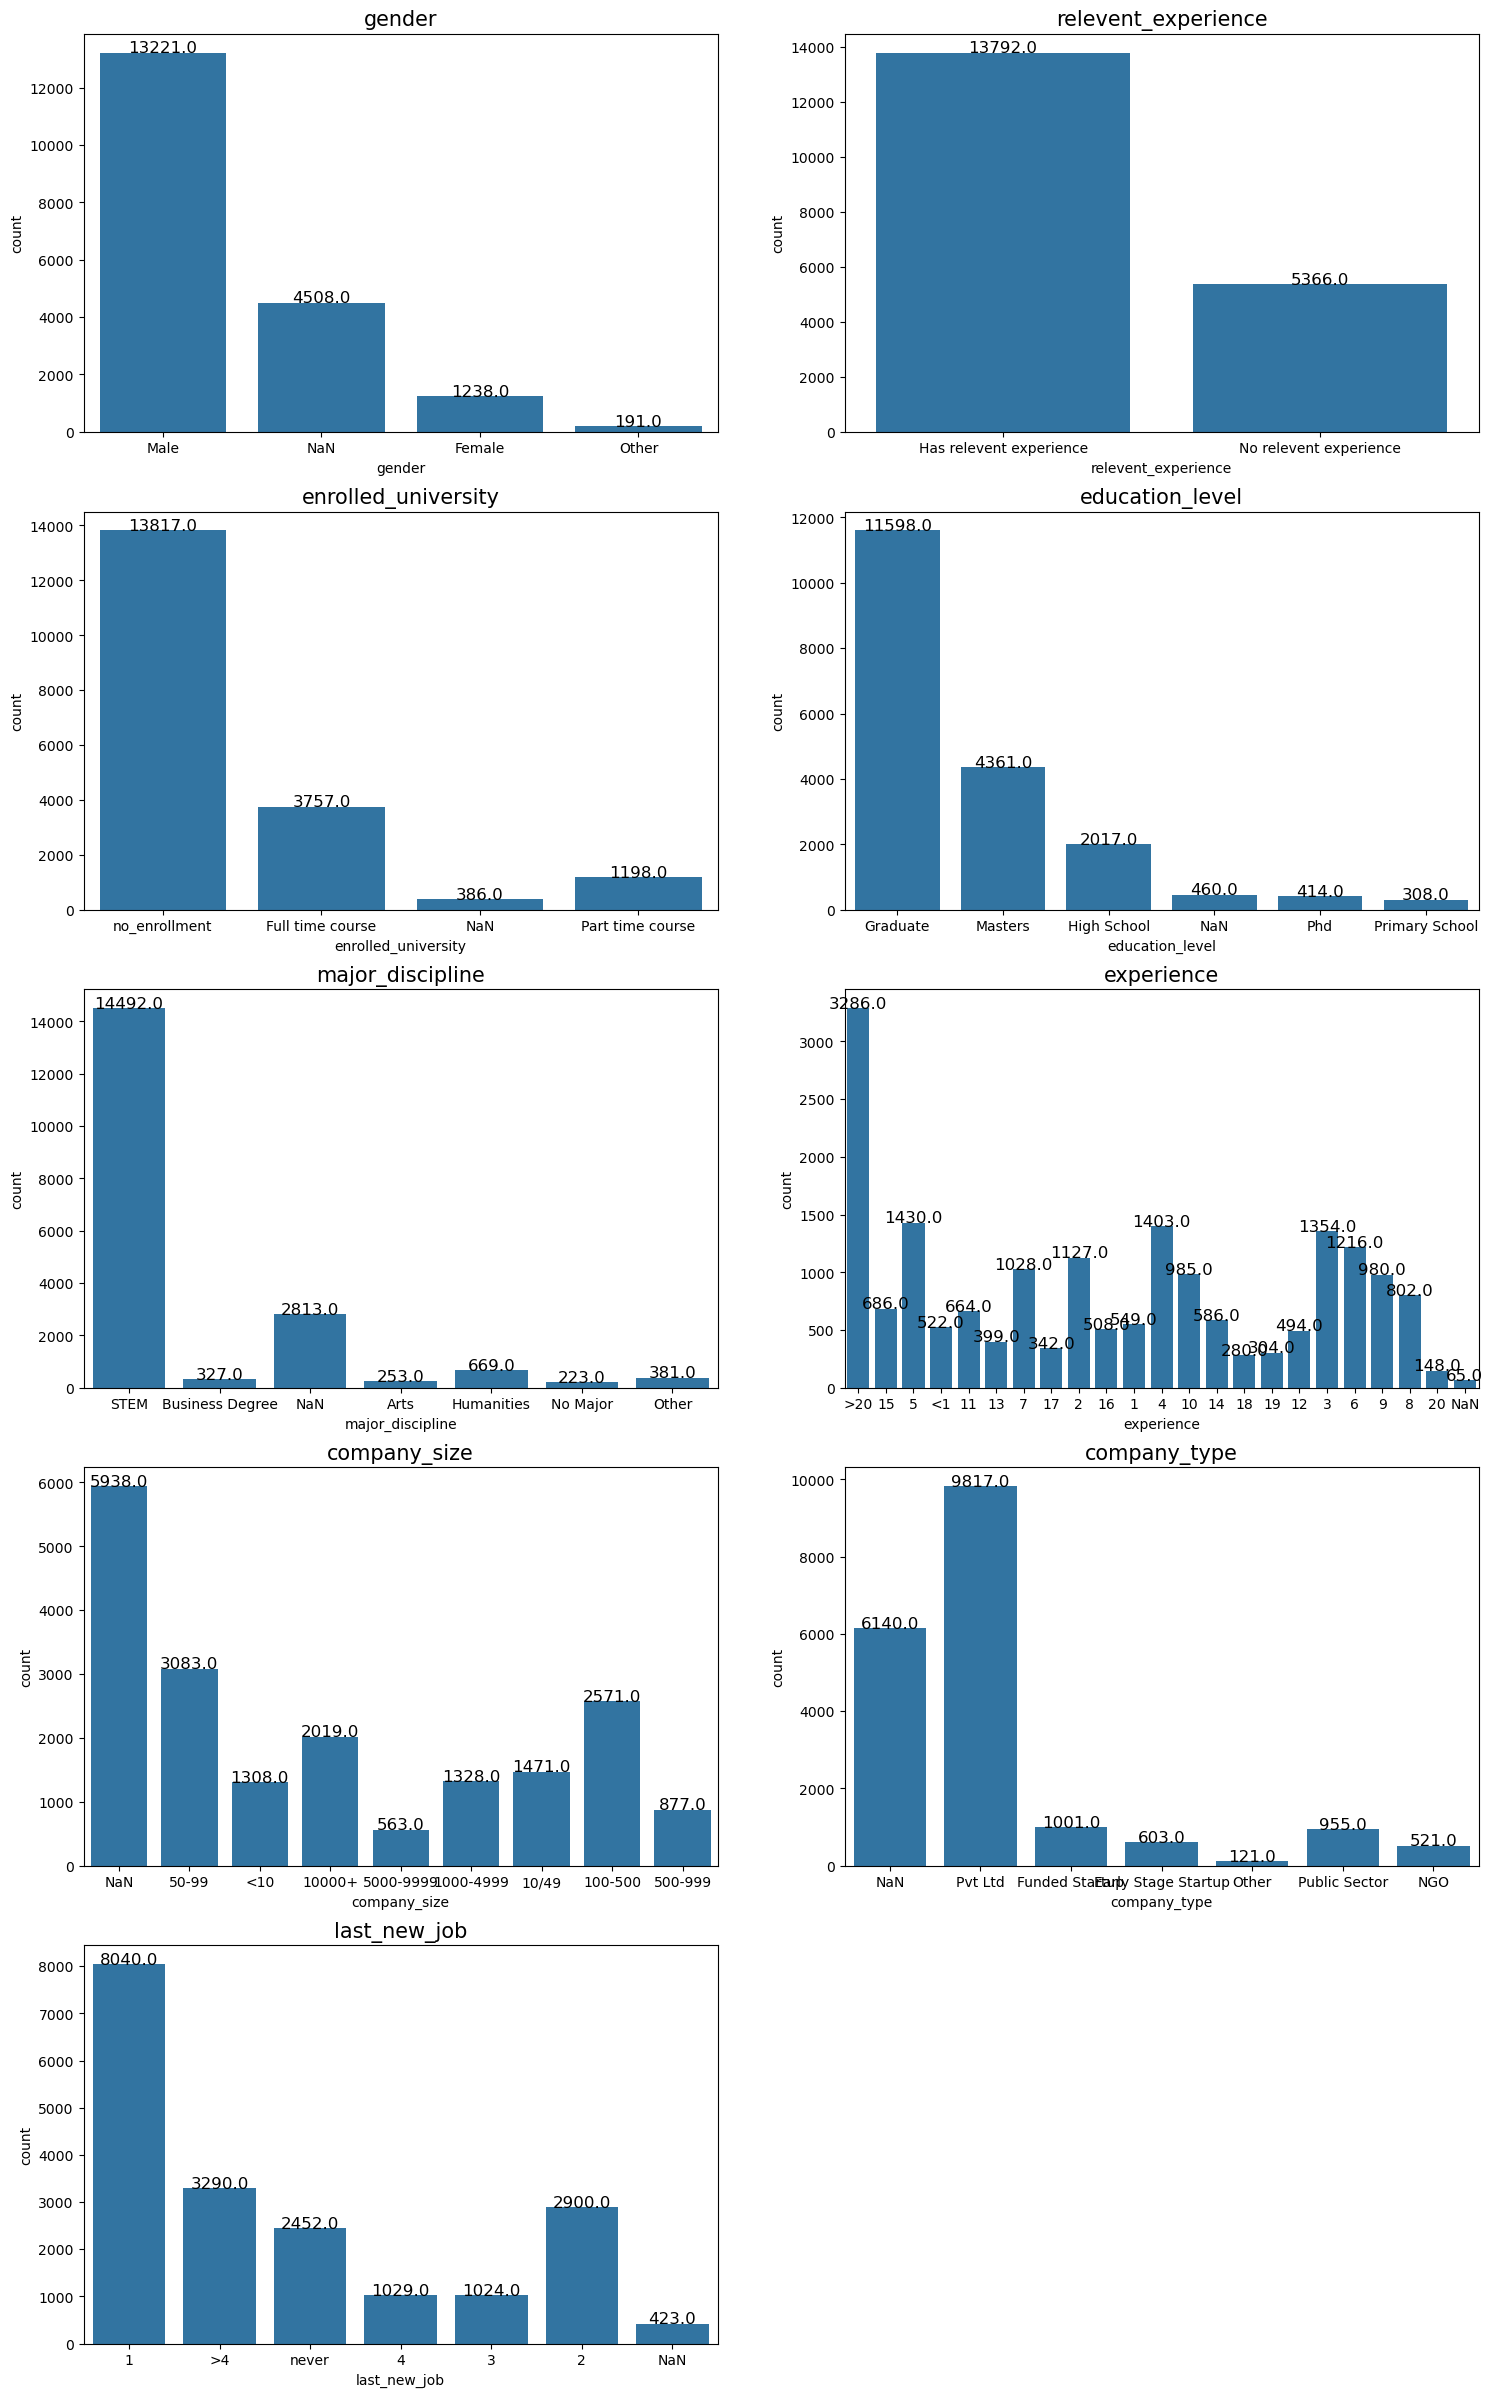

In [6]:
lista_colunas = df.select_dtypes(include = 'object').columns

plt.figure(figsize = (18,30))
cont = 0
for i in lista_colunas:
    if i not in 'city':
        cont += 1
        plt.subplot(5, 2, cont)
        ax = sns.countplot(data= df.fillna('NaN'), x = i)
        plt.title(i, fontsize = 15)
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)

plt.show()

In [ ]:
# Plot

# Tamanho da figura
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A == 8:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

### Verificando a Distribuição das Variáveis Numéricas

In [7]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


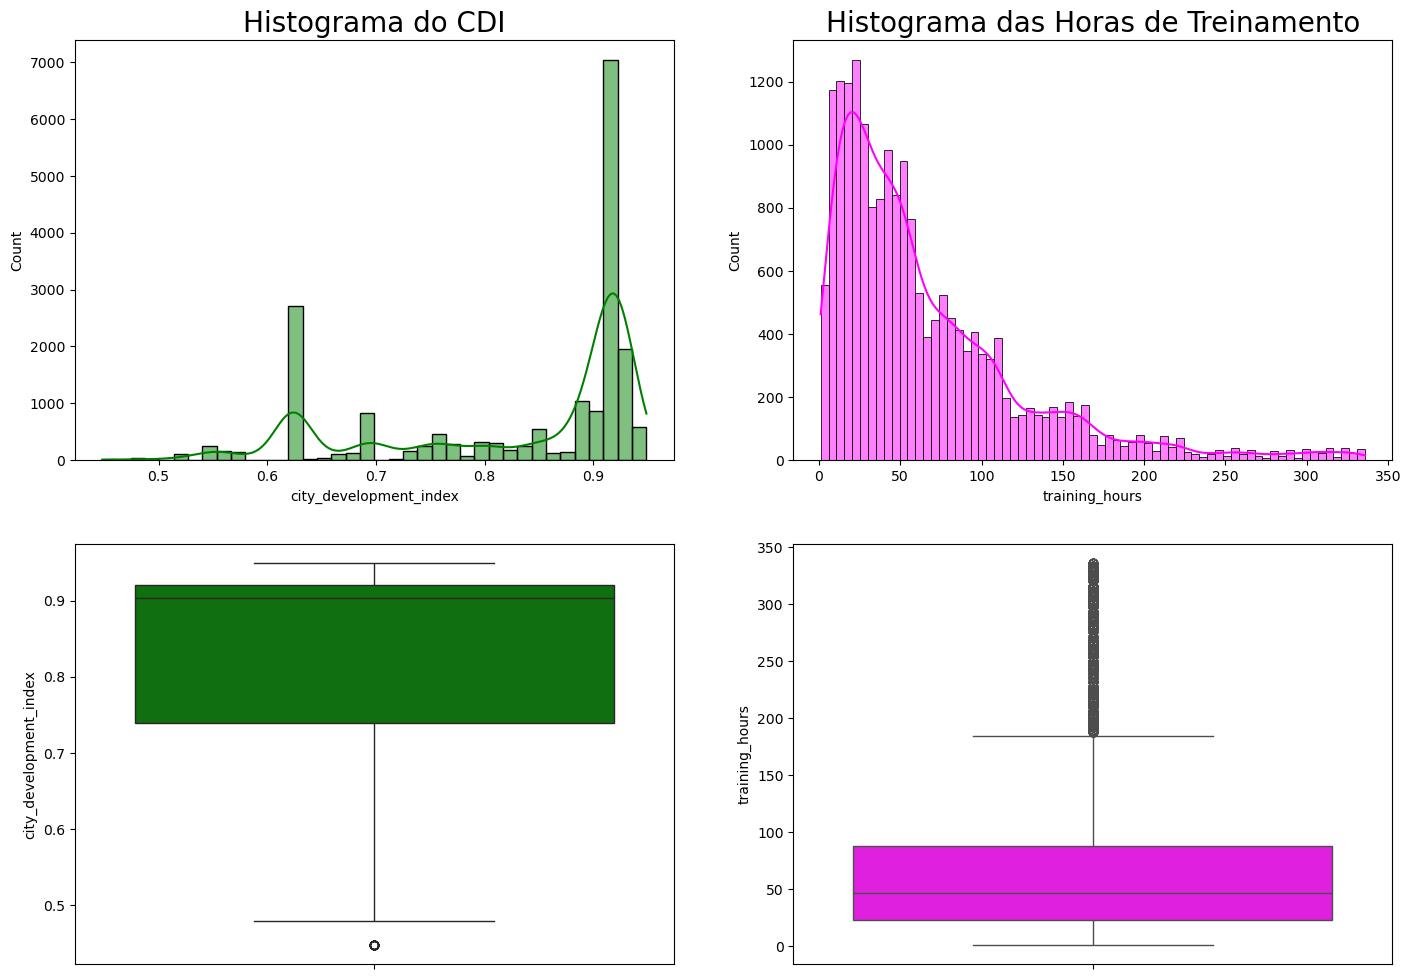

In [12]:
plt.figure(figsize = (17,12))

plt.subplot(221)
sns.color_palette('hls', 12)
sns.histplot(df['city_development_index'], kde = True, color = 'green')
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.color_palette('hls', 12)
sns.histplot(df['training_hours'], kde = True, color = 'magenta')
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

plt.subplot(223)
sns.color_palette('hls', 12)
sns.boxplot(df['city_development_index'], color = 'green')

plt.subplot(224)
sns.color_palette('hls', 12)
sns.boxplot(df['training_hours'], color = 'magenta')

plt.show()


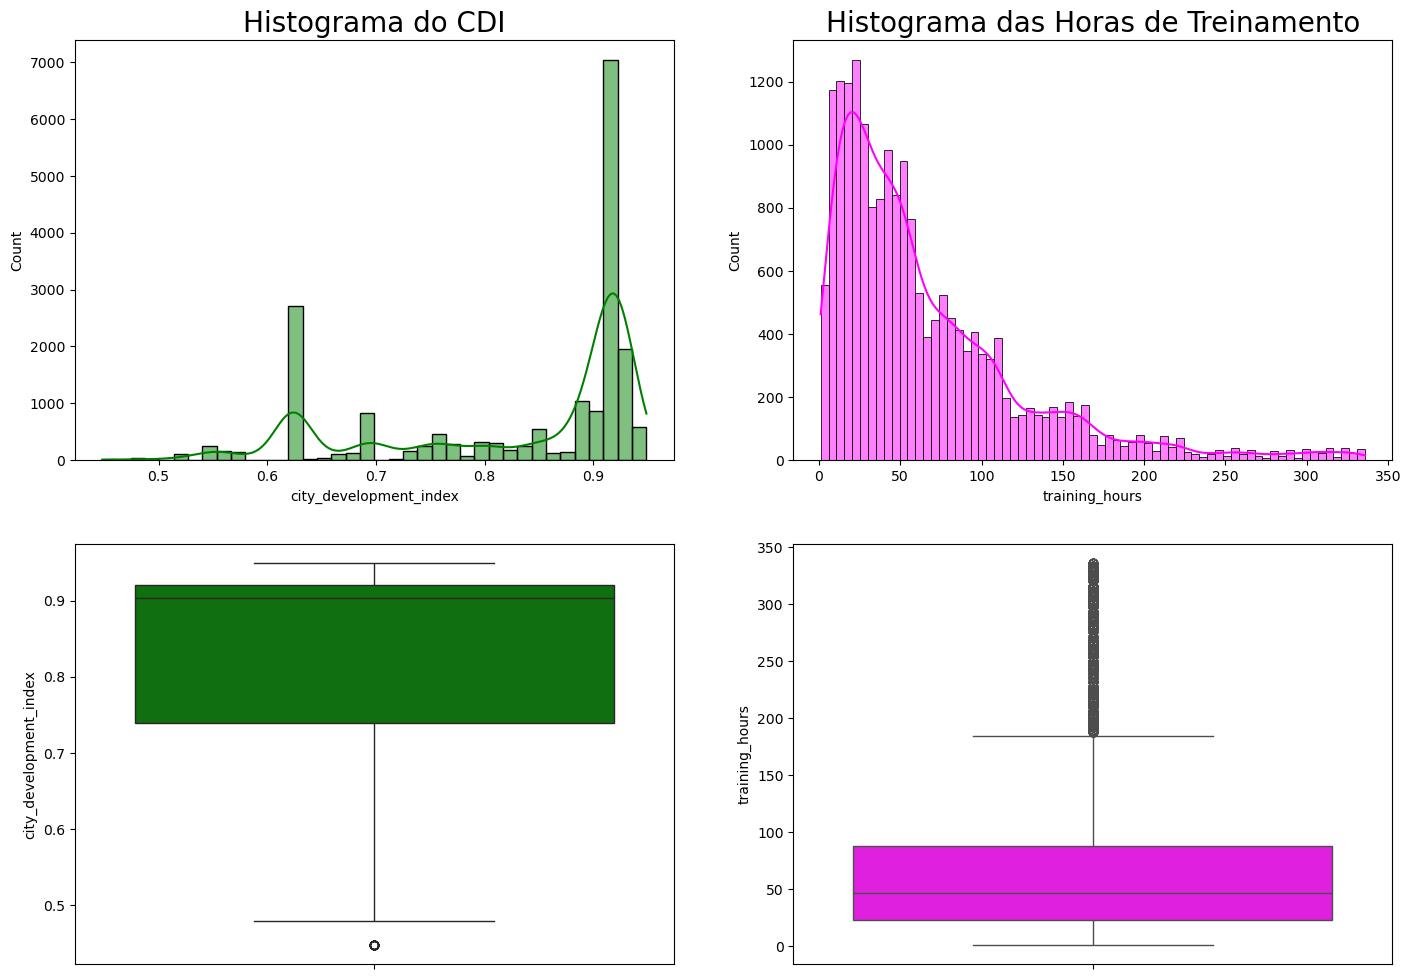

In [11]:
# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color = "green")  #KDE= Curva de Densidade
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color = "green")

plt.subplot(224)
sns.boxplot(df['training_hours'], color = "magenta")

plt.show()

Em Estatística, a distribuição normal é uma das distribuições de probabilidade mais utilizadas para modelar fenômenos naturais. Isso se deve ao fato de que um grande número de fenômenos naturais apresenta sua distribuição de probabilidade tão proximamente normal, que a ela pode ser com sucesso referida, e, portanto, com adequado acerto por ela representada como se normal fosse.

A distribuição normal, também conhecida como distribuição gaussiana, é uma curva simétrica em torno do seu ponto médio, apresentando assim seu famoso formato de sino.

Uma distribuição estatística é uma função que define uma curva, e a área sob essa curva determina a probabilidade de ocorrer o evento por ela correlacionado.

E o que é distribuição normal? É a mais importante dentre as distribuições estatísticas.

A curva de distribuição normal representa o comportamento de diversos processos nas empresas e muitos fenômenos comuns, como por exemplo, altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova.

A distribuição normal pode ser usada para aproximar distribuições discretas de probabilidade, como por exemplo a distribuição binomial. Além disso, a distribuição normal serve também como base para a inferência estatística clássica.

Nela, a média, mediana e moda dos dados possuem o mesmo valor.

![title](imagens/normal.png)

![title](imagens/boxplot.jpg)

In [13]:
features = [ 'city_development_index', 'training_hours']

for i in features:
    stats, pval = normaltest(df[i])

    if pval > 0.05:
        print(i, ': Distribuição Normal')

    else:
        print(i, ':Distribuição Não Normal')

city_development_index :Distribuição Não Normal
training_hours :Distribuição Não Normal


In [ ]:
# Teste de Normalidade da Distribuição

# Lista com as variáveis numéricas
numerical_feature = ['city_development_index', 'training_hours']

# Loop
for i in numerical_feature:
    
    # Calcula a normalidade
    stats, pval = normaltest(df[i])
    
     # Checar valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

* As variáveis **city_development_index** e **training_hours** não seguem a distribuição normal. Para a análise numérica, usaremos o método não paramétrico.


* Dados de **training_hours** estão localizados principalmente no lado esquerdo do histograma. É um comportamento esperado porque as pessoas geralmente ficam animadas ao fazer o treinamento no início, mas nem todos que começam conseguem terminar uma maratona. ;-)

### Correlação dos Dados

#### Correlação de Spearman Entre Variáveis Numéricas

Analisamos a correlação entre as variáveis numéricas e entre as variáveis numéricas e a variável alvo (o que estamos querendo analisar).

In [ ]:
df_numerical['experience'] = df_numerical['experience'].replace('>20', 21)
df_numerical['experience'] = df_numerical['experience'].replace('<1', 0)
df_numerical['experience'] = df_numerical['experience'].astype(float)
df_numerical["experience"].value_counts()

In [32]:
df_numerical['last_new_job'] = df_numerical['last_new_job'].replace('>4', 5)
df_numerical['last_new_job'] = df_numerical['last_new_job'].replace('never', 0)
df_numerical['last_new_job'].astype(float)
df_numerical['last_new_job'].value_counts()

last_new_job
1    8040
5    3290
2    2900
0    2452
4    1029
3    1024
Name: count, dtype: int64

In [ ]:
df.head()

In [ ]:
df.columns

In [15]:
# Criamos uma cópia do dataframe original
df_numerical = df.copy()

In [ ]:
df_numerical["experience"].value_counts()

In [ ]:
# Convertemos a variável experience para numérica
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)

In [ ]:
df_numerical["experience"].value_counts()

In [ ]:
df_numerical["last_new_job"].value_counts()

In [ ]:
# Convertemos a variável last_new_job para numérica
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)

In [ ]:
df_numerical["last_new_job"].value_counts()

In [ ]:
df_numerical.head()

In [ ]:
df_numerical.info()

In [33]:
# Supondo que df_numerical seja o DataFrame original

# Passo 1: Selecionar apenas as colunas numéricas
df_numerical_only = df_numerical.select_dtypes(include='number')

# Passo 2: Remover a coluna 'enrollee_id'
df_numerical_only = df_numerical_only.drop("enrollee_id", axis=1)

# Passo 3: Calcular a correlação usando o método 'spearman'
correlacao = df_numerical_only.corr(method="spearman")

# Exibir a matriz de correlação
print(correlacao)


                        city_development_index  experience  training_hours  \
city_development_index                1.000000    0.301268        0.007491   
experience                            0.301268    1.000000        0.003686   
training_hours                        0.007491    0.003686        1.000000   
target                               -0.279165   -0.183803       -0.014126   

                          target  
city_development_index -0.279165  
experience             -0.183803  
training_hours         -0.014126  
target                  1.000000  


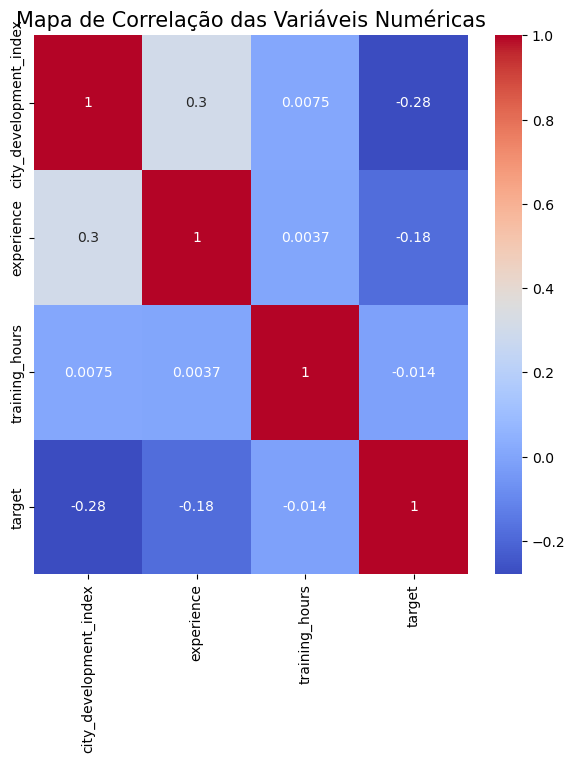

In [40]:
colunas = df_numerical.select_dtypes(include = 'number').drop('enrollee_id', axis= 1)
correlation = colunas.corr(method='spearman')

plt.figure(figsize=(7,7))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title('Mapa de Correlação das Variáveis Numéricas', fontsize = 15)
plt.show()

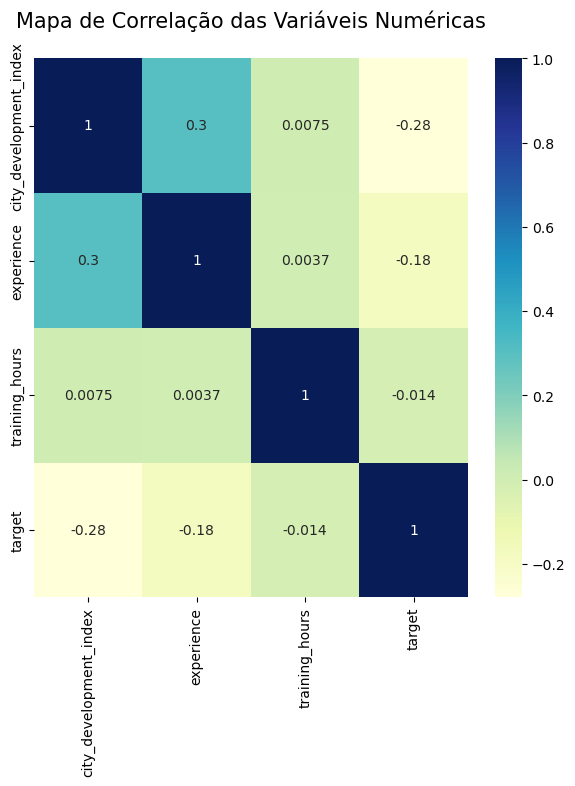

In [38]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(df_numerical_only.corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

Pela correlação de spearman, last_new_job e experience têm correlação média (0,473), enquanto outros têm correlação fraca.

As variáveis last_new_job e training_hours tem correlação próxima de zero com a variável alvo e poderiam ser descartadas.

Para a relação entre as variáveis categóricas e a variável alvo, usaremos WOE e IV.

### Weight of Evidence (WOE) e Information Value (IV)

Este conjunto de dados contém mais dados com tipo categórico do que tipo numérico. Usaremos recursos categóricos nominais para WOE e IV.

Interpretamos o resultado de IV assim:

    Information Value, Poder de Previsão
    
    < 0.02, não deve ser usado para previsão
    0.02 - 0.1, preditor fraco
    0.1 - 0.3, preditor médio
    0.3 - 0.5, preditor forte
    > 0.5, parece bom demais para ser verdade

In [16]:
def calculate_woe_iv(df, features, target):
    """
    Calcula WOE e IV para múltiplas variáveis categóricas.

    :param df: DataFrame contendo os dados
    :param features: Lista de nomes das colunas categóricas
    :param target: Nome da coluna alvo (1 para evento, 0 para não-evento)
    :return: Dicionário com DataFrames de WOE e IV para cada variável, além de um dicionário com IV total
    """
    results = {}
    iv_totals = {}

    for feature in features:
        grouped = df.groupby(feature)[target].agg(['count', 'sum'])
        grouped.columns = ['total', 'event']
        grouped['non_event'] = grouped['total'] - grouped['event']

        # Cálculo de proporções
        grouped['event_rate'] = grouped['event'] / grouped['event'].sum()
        grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()

        # Cálculo do WOE
        grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])

        # Cálculo do IV
        grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']

        # IV total
        iv_total = grouped['iv'].sum()

        # Armazena resultados
        results[feature] = grouped[['woe', 'iv']]
        iv_totals[feature] = iv_total

    return results, iv_totals

categoricas = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

woe_iv_results, iv_total_results = calculate_woe_iv(df, categoricas, 'target')

for feature in woe_iv_results:
    print(f"\nWOE e IV para {feature}:")
    print(woe_iv_results[feature])
    print(f"IV total para {feature}: {iv_total_results[feature]:.4f}")


WOE e IV para gender:
             woe        iv
gender                    
Female  0.172452  0.002628
Male   -0.019471  0.000340
Other   0.164458  0.000368
IV total para gender: 0.0033

WOE e IV para relevent_experience:
                              woe        iv
relevent_experience                        
Has relevent experience -0.194790  0.025966
No relevent experience   0.431784  0.057557
IV total para relevent_experience: 0.0835

WOE e IV para enrolled_university:
                          woe        iv
enrolled_university                    
Full time course     0.623947  0.089052
Part time course     0.022210  0.000032
no_enrollment       -0.206746  0.029802
IV total para enrolled_university: 0.1189

WOE e IV para education_level:
                      woe        iv
education_level                    
Graduate         0.153535  0.015175
High School     -0.316640  0.009945
Masters         -0.199562  0.008819
Phd             -0.715448  0.009280
Primary School  -0.774636  0.0079

In [ ]:
# Loop
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')

<Figure size 1000x1200 with 0 Axes>

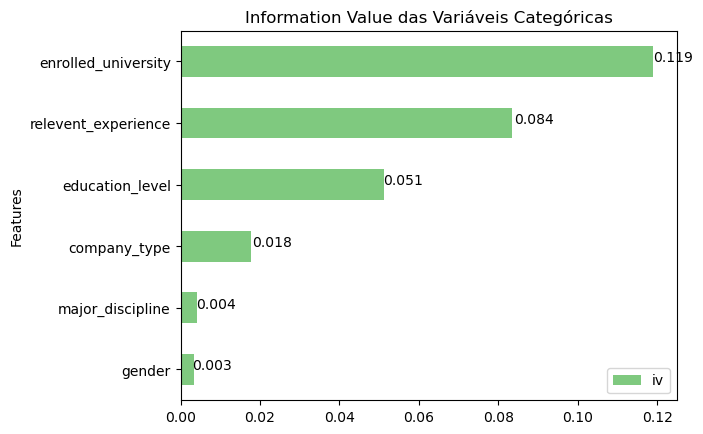

In [3]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

* No gráfico acima, podemos ver a ordem dos recursos com base em seu poder preditivo em relação ao alvo.
* Com base em seu valor IV, `enrolled_university` é um preditor médio, `relevent_experience` e `education_level` são preditores fracos e os outros são inúteis para a previsão.

### Identificando Valores Ausentes

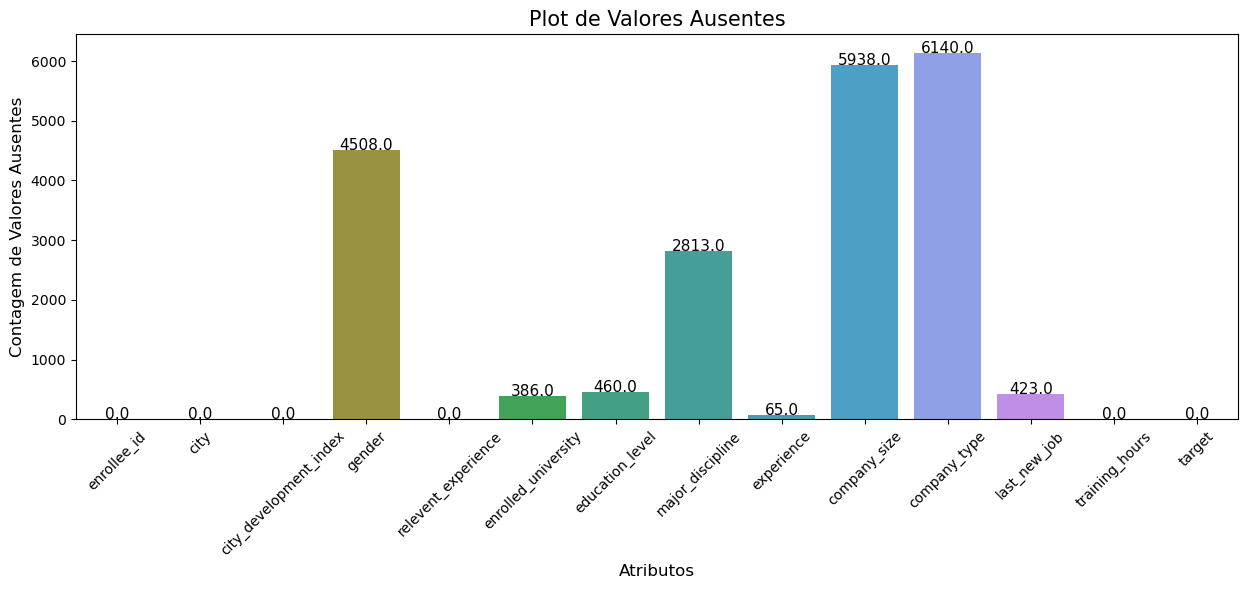

In [25]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(x=null_df['index'], y=null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

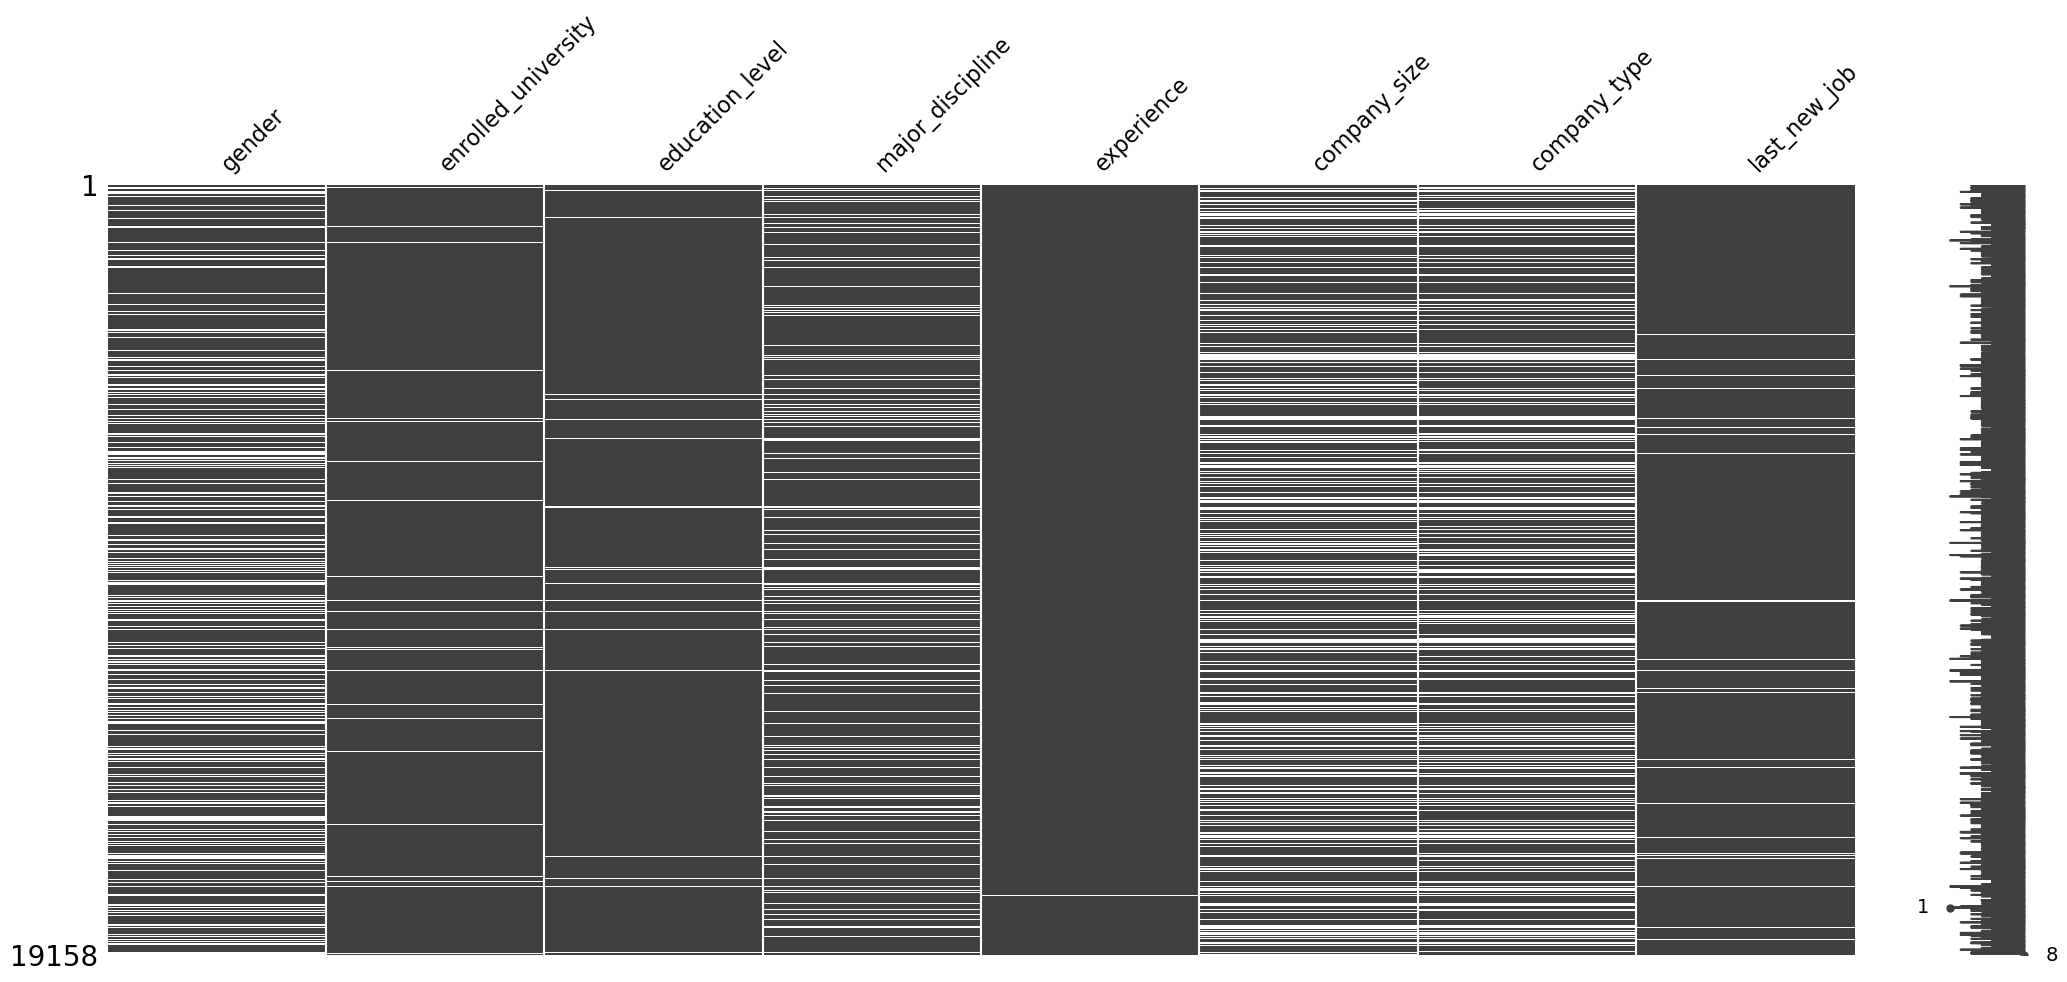

In [19]:
# Gera a visualização

# Dataframe
df_nan = pd.DataFrame(df.isna().sum())

# Plot - Mapa de Valores Ausentes
if df.isna().any(axis = None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

Valores ausentes em cada coluna têm um padrão aleatório.

### Identificando Valores Duplicados

In [26]:
# Checando valores duplicados (não há)
df['enrollee_id'].duplicated().sum()

0

### Identificando Dados Desbalanceados

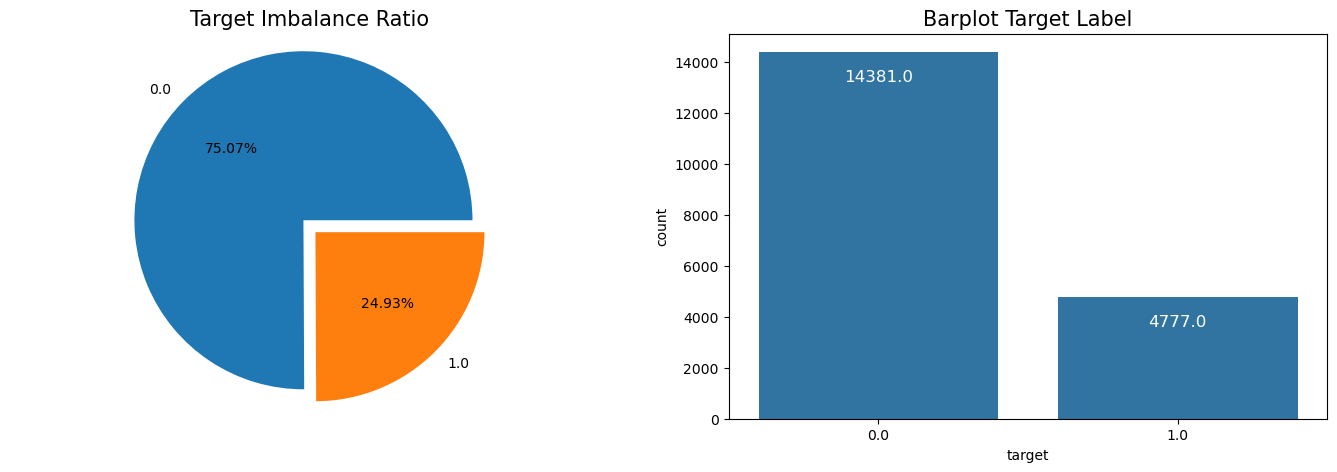

In [27]:
# Figura
plt.figure(figsize = (17,(100)/20))

plt.subplot(121)

plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels = list(df['target'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'target')
plt.title("Barplot Target Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 12)

Os dados estão desbalanceados em relação à variável target.

## Limpeza e Processamento dos Dados

Em que momento fazemos a limpeza dos dados?

### Tratando os Valores Ausentes

In [ ]:
df.columns

In [30]:
colunas_manter = ['city_development_index', 
                  'experience', 
                  'enrolled_university', 
                  'relevent_experience', 
                  'education_level',
                  'company_type',
                  'major_discipline',
                  'target']

In [31]:
new_df = df[colunas_manter]

In [ ]:
new_df.head()

In [ ]:
df.head()

In [ ]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

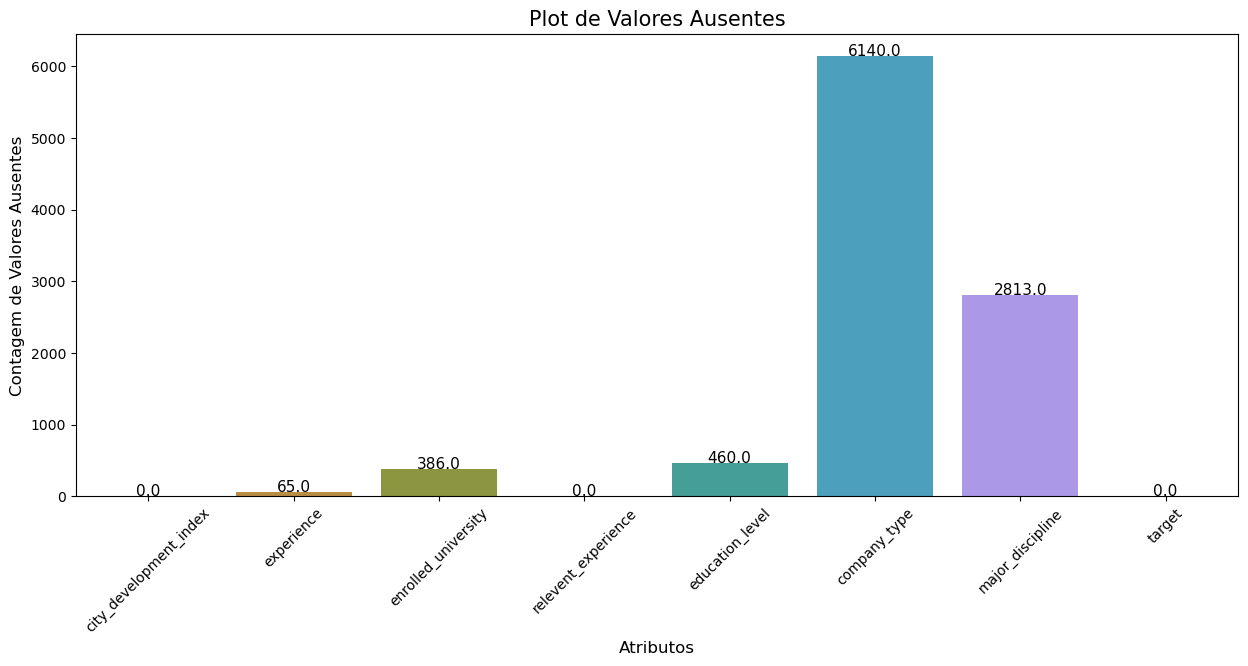

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'new_df' seja o DataFrame original

# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()
null_df.columns = ['Atributos', 'Valores_Ausentes']

# Figura
plt.figure(figsize=(15, 6))

# Barplot
ax = sns.barplot(x='Atributos', y='Valores_Ausentes', data=null_df, palette='husl')
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Contagem de Valores Ausentes', fontsize=12)
plt.xticks(rotation=45)
plt.title('Plot de Valores Ausentes', fontsize=15)

# Anotações
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, p.get_height()), ha='center', color='black', size=11)

plt.show()


#### Variável major_discipline

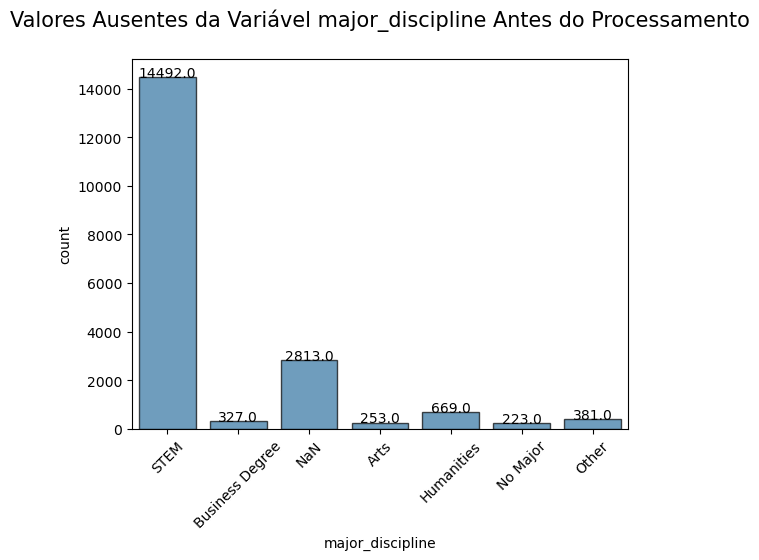

In [33]:
# Valores Ausentes da Variável major_discipline Antes do Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento\n", fontsize = 15)
plt.show()

In [ ]:
# Relação entre major_discipline x education_level
print('\nTotal de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)

Dentre os registros com valores ausentes, vemos a proporção na variável education_level.

Preencheremos os valores NA da variável `major_discipline` com `Non Degree`.

In [ ]:
# Cria o índice
nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level']=='High School') | (new_df['education_level'].isna()) | (new_df['education_level']=='Primary School'))]).index


In [ ]:
len(nan_index)

In [ ]:
# Imputação do valor ausente
new_df['major_discipline'][nan_index] = 'Non Degree'

In [ ]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

In [ ]:
# Valores Ausentes da Variável major_discipline Após o Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n", fontsize = 15)
plt.show()

In [ ]:
# Para os valores ausentes restantes preenchemos com 'Other'
new_df[new_df['major_discipline'].isna()]  = 'Other'

In [ ]:
# Valores Ausentes da Variável major_discipline Após o Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n", fontsize = 15)
plt.show()

In [ ]:
new_df.head()

#### Variável enrolled_university

In [ ]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Antes do Processamento\n", fontsize = 15)
plt.show()

In [ ]:
print('\nTotal de Valores Ausentes na Variável enrolled_university:', new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Candidatos com `Primary School` como `education_level` não estão qualificados para ingressar na universidade. Portanto, preencheremos valores `NaN` em `education_level` para `Primary Grad`.

In [ ]:
# Prepara o índice
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [ ]:
len(nan_index)

In [ ]:
# Imputação de valores ausentes
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [ ]:
print('Total de Valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

In [ ]:
# Prepara o índice
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [ ]:
# O restante colocamos como 'Other'
new_df['enrolled_university'][nan_index] = 'Other'

In [ ]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Após o Processamento\n", fontsize = 15)
plt.show()

In [ ]:
new_df.head()

#### Variável company_type

In [ ]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

In [ ]:
new_df['company_type'].value_counts(dropna = False)

In [ ]:
# Índice
nan_index = new_df[(new_df['company_type'].isna())].index

In [ ]:
# Imputação dos valores NaN com 'Other'
new_df['company_type'][nan_index] = 'Other'

In [ ]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

In [ ]:
new_df.head()

#### Variável education_level

In [ ]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Antes do Processamento\n", fontsize = 15)
plt.show()

In [ ]:
# Índice
nan_index = new_df[(new_df['education_level'].isna())].index

In [ ]:
# Imputação dos valores NaN com 'Other'
new_df['education_level'][nan_index] = 'Other'

In [ ]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Após do Processamento\n", fontsize = 15)
plt.show()

In [ ]:
new_df.head()

#### Variável experience

In [ ]:
new_df.info()

In [ ]:
new_df['experience'].value_counts(dropna = False)

In [ ]:
# Percentual de valores ausentes
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

In [ ]:
new_df['experience'].isnull().sum()

In [ ]:
new_df.shape

In [ ]:
new_df = new_df.dropna()

In [ ]:
new_df.shape

In [ ]:
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

In [ ]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

### Ajustes Finais

In [ ]:
new_df.head()

In [ ]:
# Ajustando os dados
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [ ]:
new_df.head()

In [ ]:
x = new_df.drop(columns = ['target'])
y = new_df['target']

## Relatório Final

Com base em nossa análise observamos que as variáveis mais relevantes para identificar um bom candidato são:

- Índice de Desenvolvimento da cidade onde mora o candidato.
- Tempo de experiência profissional.
- Se está ou não matriculado em um curso universitário.
- Se tem ou não experiência relevante.
- O nível educacional.
- O tipo de empresa que o candidato trabalhou ou trabalha atualmente.
- A especialização na graduação (quando for o caso).

Não são relevantes para a análise:

- O ID do candidato.
- O código da cidade do candidato.
- O gênero.
- A última vez que o candidato esteve empregado.
- O tamanho da empresa (quando for o caso).
- Total de horas de treimamento.


**Recomendações do Analista de Dados**:

- O RH pode desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso.

- O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo, sem experiência relevante, nível de educação superior e menor experiência de trabalho para ter maior chance de encontrar candidatos que estão procurando um emprego.

- O RH pode tornar o treinamento mais compacto porque muitas pessoas não precisam de muito tempo para concluir o treinamento.

# Fim